In [54]:
import os
import sys
import shutil
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image as Pilim
from IPython.display import Image 
%matplotlib inline

In [134]:
path_img = Path('/home/fredrikmathisen/Documents/data/predspicks/with_text//')
out_path = Path('/home/fredrikmathisen/Documents/data/predspicks/output')
input_images_list = glob.glob(str(path_img) + '/*.png')

In [135]:
print(input_images_list)

['/home/fredrikmathisen/Documents/data/predspicks/with_text/00000016.png', '/home/fredrikmathisen/Documents/data/predspicks/with_text/00000010.png', '/home/fredrikmathisen/Documents/data/predspicks/with_text/00000018.png', '/home/fredrikmathisen/Documents/data/predspicks/with_text/00000002.png', '/home/fredrikmathisen/Documents/data/predspicks/with_text/00000015.png', '/home/fredrikmathisen/Documents/data/predspicks/with_text/00000008.png', '/home/fredrikmathisen/Documents/data/predspicks/with_text/00000011.png', '/home/fredrikmathisen/Documents/data/predspicks/with_text/00000017.png', '/home/fredrikmathisen/Documents/data/predspicks/with_text/00000006.png', '/home/fredrikmathisen/Documents/data/predspicks/with_text/00000007.png', '/home/fredrikmathisen/Documents/data/predspicks/with_text/00000019.png', '/home/fredrikmathisen/Documents/data/predspicks/with_text/00000005.png', '/home/fredrikmathisen/Documents/data/predspicks/with_text/00000014.png', '/home/fredrikmathisen/Documents/data

In [136]:
#inp_img_dir = './input_dir/images'
out_dir = './output'
height = 256
width = 256
start_num = 0

In [137]:
def dir_create(path):
    if (os.path.exists(path)) and (os.listdir(path) != []):
        shutil.rmtree(path)
        os.makedirs(path)
    if not os.path.exists(path):
        os.makedirs(path)

In [138]:
def crop(input_file, height, width):
    img = Pilim.open(input_file)
    img_width, img_height = img.size
    for i in range(img_height//height):
        for j in range(img_width//width):
            box = (j*width, i*height, (j+1)*width, (i+1)*height)
            yield img.crop(box)

In [139]:
img = Pilim.open(str(path_img) + '/00000000.png')

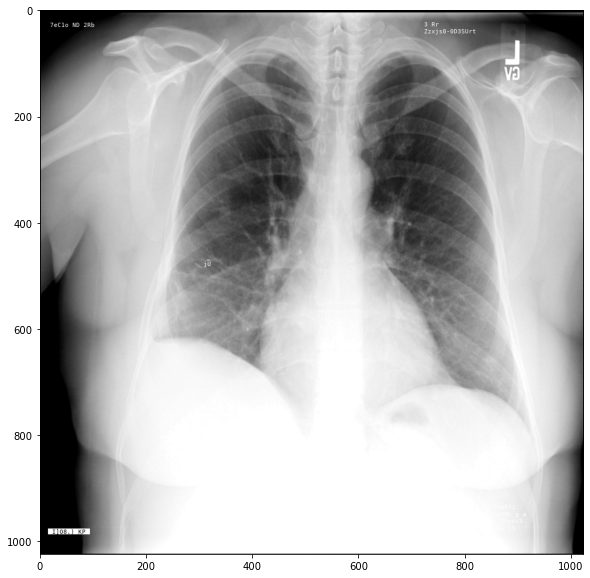

In [140]:
plt.figure(figsize=(10,10))
plt.imshow(img)

In [141]:
def split(inp_img_dir, out_dir, height, width, 
          start_num):
    image_dir = os.path.join(out_dir, 'images')
    dir_create(out_dir)
    dir_create(image_dir)
    img_list = [f for f in
                os.listdir(inp_img_dir)
                if os.path.isfile(os.path.join(inp_img_dir, f))]
    file_num = 0
    for infile in img_list:
        infile_path = os.path.join(inp_img_dir, infile)
        for k, piece in enumerate(crop(infile_path,
                                       height, width), start_num):
            img = Pilim.new('RGB', (height, width), 255)
            img.paste(piece)
            img_path = os.path.join(image_dir, 
                                    infile.split('.')[0]+ '_'
                                    + str(k).zfill(5) + '.png')
            img.save(img_path)
        file_num += 1
        sys.stdout.write("\rFile %s was processed." % file_num)
        sys.stdout.flush()

In [142]:
def image_part_plotter(images_list, offset):
    fig = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 4
    # ax enables access to manipulate each of subplots
    ax = []
    for i in range(columns*rows):
        # create subplot and append to ax
        img = mpimg.imread(images_list[i+offset])
        ax.append(fig.add_subplot(rows, columns, i+1))
        ax[-1].set_title('image part number ' + str(i+1))
        plt.imshow(img)
    plt.show() # Render the plot

In [143]:
split(path_img, out_dir, height, width, start_num)

File 20 was processed.

In [144]:
out_path = Path('/home/fredrikmathisen/Documents/imagesplit/output/images/') 

In [145]:
print(out_path)

/home/fredrikmathisen/Documents/imagesplit/output/images


In [146]:
output_image_list = glob.glob(str(out_path) + '/*.png')
output_image_list = sorted(output_image_list)
# output_image_list
print(output_image_list)

['/home/fredrikmathisen/Documents/imagesplit/output/images/00000000_00000.png', '/home/fredrikmathisen/Documents/imagesplit/output/images/00000000_00001.png', '/home/fredrikmathisen/Documents/imagesplit/output/images/00000000_00002.png', '/home/fredrikmathisen/Documents/imagesplit/output/images/00000000_00003.png', '/home/fredrikmathisen/Documents/imagesplit/output/images/00000000_00004.png', '/home/fredrikmathisen/Documents/imagesplit/output/images/00000000_00005.png', '/home/fredrikmathisen/Documents/imagesplit/output/images/00000000_00006.png', '/home/fredrikmathisen/Documents/imagesplit/output/images/00000000_00007.png', '/home/fredrikmathisen/Documents/imagesplit/output/images/00000000_00008.png', '/home/fredrikmathisen/Documents/imagesplit/output/images/00000000_00009.png', '/home/fredrikmathisen/Documents/imagesplit/output/images/00000000_00010.png', '/home/fredrikmathisen/Documents/imagesplit/output/images/00000000_00011.png', '/home/fredrikmathisen/Documents/imagesplit/output/

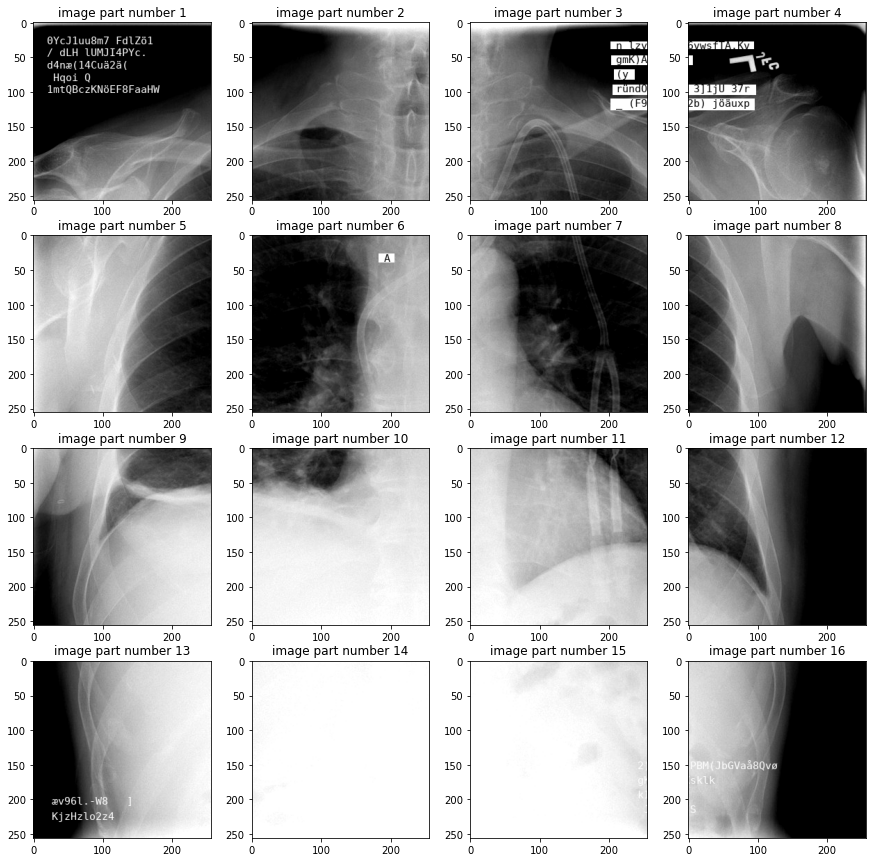

In [149]:
image_part_plotter(output_image_list,32)